In [1]:
!pip install numpy==1.26.4 # specific version of numpy library

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 87.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [1]:
import numpy as np
print ("Numpy version:", np.__version__)

Numpy version: 1.26.4


In [2]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 20.8 MB/s eta 0:00:00


In [3]:
!pip install opendatasets

In [4]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/gratefuldata/intraday-stock-data-1-min-sp-500-200821/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sudeshnadass
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/gratefuldata/intraday-stock-data-1-min-sp-500-200821


100%|██████████| 36.3M/36.3M [00:00<00:00, 1.23GB/s]

In [5]:
!pip uninstall -y pmdarima
!pip install pmdarima


Found existing installation: pmdarima 2.0.4
Uninstalling pmdarima-2.0.4:
  Successfully uninstalled pmdarima-2.0.4
  Using cached pmdarima-2.0.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
Using cached pmdarima-2.0.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl (2.2 MB)


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error


In [7]:
df = pd.read_csv("/content/intraday-stock-data-1-min-sp-500-200821/1_min_SPY_2008-2021.csv")
df

,Unnamed: 0,date,open,high,low,close,volume,barCount,average
0,0,20090522 07:30:00,89.45,89.46,89.37,89.37,7872,2102,89.424
1,1,20090522 07:31:00,89.38,89.53,89.37,89.50,5336,1938,89.468
2,2,20090522 07:32:00,89.51,89.54,89.48,89.49,3349,1184,89.516
3,3,20090522 07:33:00,89.49,89.49,89.31,89.34,3495,1240,89.386
4,4,20090522 07:34:00,89.33,89.46,89.33,89.39,9731,2637,89.379
...,...,...,...,...,...,...,...,...,...
2070829,2070829,20101222 13:55:00,125.73,125.73,125.71,125.71,1876,677,125.714
2070830,2070830,20101222 13:56:00,125.71,125.74,125.71,125.74,4769,1011,125.724
2070831,2070831,20101222 13:57:00,125.74,125.74,125.73,125.74,2602,588,125.738
2070832,2070832,20101222 13:58:00,125.74,125.82,125.73,125.81,22953,2866,125.776


In [8]:
print(df.columns)

Index(['Unnamed: 0', 'date', 'open', 'high', 'low', 'close', 'volume',
       'barCount', 'average'],
      dtype='object')


In [9]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])
df['date']

,date
0,2009-05-22 07:30:00
1,2009-05-22 07:31:00
2,2009-05-22 07:32:00
3,2009-05-22 07:33:00
4,2009-05-22 07:34:00
...,...
2070829,2010-12-22 13:55:00
2070830,2010-12-22 13:56:00
2070831,2010-12-22 13:57:00
2070832,2010-12-22 13:58:00


In [10]:
# Set the 'data' as the index
df.set_index('date', inplace=True)
print(df)

                     Unnamed: 0    open    high     low   close  volume  \
date                                                                      
2009-05-22 07:30:00           0   89.45   89.46   89.37   89.37    7872   
2009-05-22 07:31:00           1   89.38   89.53   89.37   89.50    5336   
2009-05-22 07:32:00           2   89.51   89.54   89.48   89.49    3349   
2009-05-22 07:33:00           3   89.49   89.49   89.31   89.34    3495   
2009-05-22 07:34:00           4   89.33   89.46   89.33   89.39    9731   
...                         ...     ...     ...     ...     ...     ...   
2010-12-22 13:55:00     2070829  125.73  125.73  125.71  125.71    1876   
2010-12-22 13:56:00     2070830  125.71  125.74  125.71  125.74    4769   
2010-12-22 13:57:00     2070831  125.74  125.74  125.73  125.74    2602   
2010-12-22 13:58:00     2070832  125.74  125.82  125.73  125.81   22953   
2010-12-22 13:59:00     2070833  125.82  125.82  125.77  125.78   12895   

                     bar

In [11]:
#Check for Stationarity
from statsmodels.tsa.stattools import adfuller
sample_data = df['close'].dropna().head(10000)
result = adfuller(sample_data)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

ADF Statistic: -2.896040330450744
p-value: 0.045810394539831094
Critical Values:
	1%: -3.4310041633725734
	5%: -2.861829101294412
	10%: -2.566923883481157


In [12]:
#Differencing the Series
if result[1] > 0.05:
    print("The series is non-stationary. Differencing is required.")
    df_diff = df.diff().dropna()
else:
    print("The series is stationary.")
    df_diff = df

The series is stationary.


In [13]:
#Resample the Data
df_resample = df['close'].resample('1T').mean()
print(df_resample)

<ipython-input-13-3358934781>:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_resample = df['close'].resample('1T').mean()


date
2008-01-22 07:30:00    126.67
2008-01-22 07:31:00    127.12
2008-01-22 07:32:00    126.78
2008-01-22 07:33:00    126.54
2008-01-22 07:34:00    126.78
                        ...  
2021-05-06 13:55:00    418.49
2021-05-06 13:56:00    418.64
2021-05-06 13:57:00    418.79
2021-05-06 13:58:00    418.76
2021-05-06 13:59:00    419.08
Freq: min, Name: close, Length: 6988710, dtype: float64


In [14]:
#Check for missing values in each column of the resampled DataFrame
print(df_resample.isnull().sum())

5555930


In [15]:
#Remove all rows that contain any missing (NaN) values from the resampled DataFrame
df_resample1 = df_resample.dropna()
df_resample1

,close
date,
2008-01-22 07:30:00,126.67
2008-01-22 07:31:00,127.12
2008-01-22 07:32:00,126.78
2008-01-22 07:33:00,126.54
2008-01-22 07:34:00,126.78
...,...
2021-05-06 13:55:00,418.49
2021-05-06 13:56:00,418.64
2021-05-06 13:57:00,418.79


Fitting Fast Auto ARIMA: 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  980
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 548.829
Date:                Mon, 16 Jun 2025   AIC                          -1095.658
Time:                        13:41:33   BIC                          -1090.771
Sample:                             0   HQIC                         -1093.799
                                - 980                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0191      0.000     77.571      0.000       0.019       0.020
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):             20949.08
Prob(Q):                              0.64   Pr

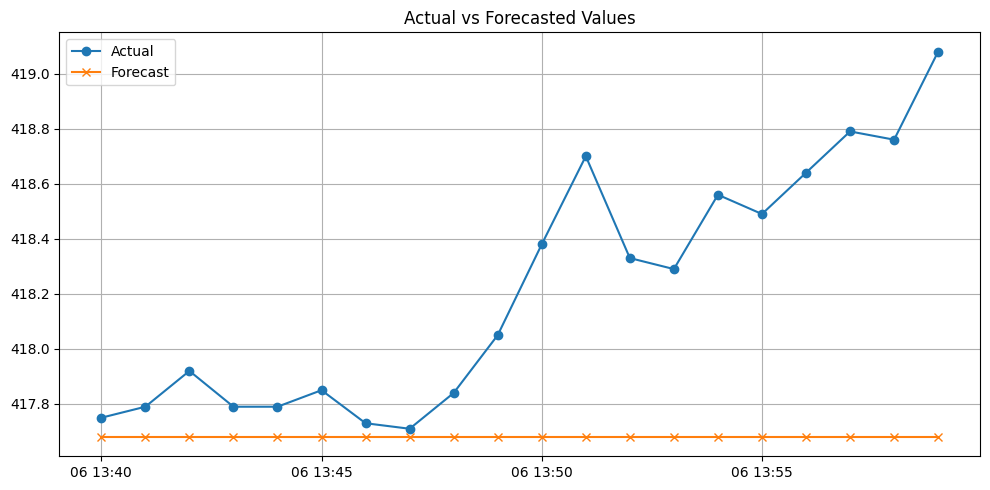

In [16]:
import pandas as pd
import numpy as np
import warnings
import logging
import gc
from tqdm import tqdm
from pmdarima import auto_arima

#configuration
warnings.filterwarnings("ignore", category=FutureWarning)

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(message)s')
logger = logging.getLogger()


# Use only last 1000 points
df_resample1 = df_resample1.tail(1000)

# Convert to float32 to reduce memory usage
df_resample1 = df_resample1.astype(np.float32)

#train-test split
train = df_resample1.iloc[:-20]
test = df_resample1.iloc[-20:]

#arima training
logger.info("Starting FAST Auto ARIMA training...")

with tqdm(total=1, desc="Fitting Fast Auto ARIMA") as pbar:
    m1_fit = auto_arima(
        train,
        start_p=0, start_q=0,
        max_p=1, max_q=1,
        d=1,
        seasonal=False,
        stepwise=True,
        trace=False,
        error_action='ignore',
        suppress_warnings=True,
        maxiter=20,
        n_fits=5,
        return_valid_fits=False
    )
    pbar.update(1)

gc.collect()

logger.info("Auto ARIMA training complete.")
logger.info("Model summary:")
print(m1_fit.summary())

#forecasting
forecast = m1_fit.predict(n_periods=len(test))

print("\nForecasted Values:")
print(forecast)

print("\nActual Values:")
print(test.values)

#plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(test.index, test.values, label="Actual", marker='o')
plt.plot(test.index, forecast, label="Forecast", marker='x')
plt.title("Actual vs Forecasted Values")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [17]:
from statsmodels.tsa.arima.model import ARIMA
m1 = ARIMA(df_resample1, order=(0, 1, 0)) # Create ARIMA model with order (0, 1, 0)
m1_fit = m1.fit() # Fit the model to the data
print(m1_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1000
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 551.880
Date:                Mon, 16 Jun 2025   AIC                          -1101.759
Time:                        13:41:54   BIC                          -1096.852
Sample:                             0   HQIC                         -1099.894
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0194      0.000     76.495      0.000       0.019       0.020
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):             19196.70
Prob(Q):                              0.69   Pr

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [18]:
# Adjust the start and end points for prediction to match the test set
start_index = len(train)
end_index = len(df_resample1) - 1 # Or start_index + len(test) - 1

forecast = m1_fit.predict(start=start_index, end=end_index)
print("Forecasted Values:")
print(forecast)

Forecasted Values:
date
2021-05-06 13:40:00    417.679993
2021-05-06 13:41:00    417.750000
2021-05-06 13:42:00    417.790009
2021-05-06 13:43:00    417.920013
2021-05-06 13:44:00    417.790009
2021-05-06 13:45:00    417.790009
2021-05-06 13:46:00    417.850006
2021-05-06 13:47:00    417.730011
2021-05-06 13:48:00    417.709991
2021-05-06 13:49:00    417.839996
2021-05-06 13:50:00    418.049988
2021-05-06 13:51:00    418.380005
2021-05-06 13:52:00    418.700012
2021-05-06 13:53:00    418.329987
2021-05-06 13:54:00    418.290009
2021-05-06 13:55:00    418.559998
2021-05-06 13:56:00    418.489990
2021-05-06 13:57:00    418.640015
2021-05-06 13:58:00    418.790009
2021-05-06 13:59:00    418.760010
Name: predicted_mean, dtype: float64


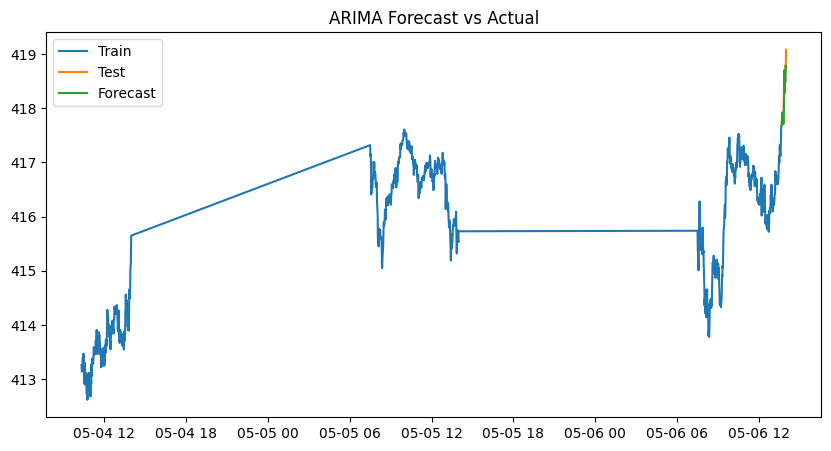

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.title("ARIMA Forecast vs Actual")
plt.legend()
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

mse = mean_squared_error(test, forecast) #Calculates the average of the squared differences between the actual values (test) and the predicted values
mae = mean_absolute_error(test, forecast) #Calculates the average of the absolute differences between the actual and predicted values
mape = np.mean(np.abs((test - forecast) / test)) * 100 #Calculates the average of the percentage error between actual and predicted values

print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'MAPE: {mape:.2f}%')

MSE: 0.03
MAE: 0.15
MAPE: 0.04%


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [22]:
# Split data into training and testing sets
train_size = int(len(df_resample1) * 0.8) # Using 80% of data for training
train, test = df_resample1[0:train_size], df_resample1[train_size:]

print("Training set size:", len(train))
print("Testing set size:", len(test))

Training set size: 800
Testing set size: 200


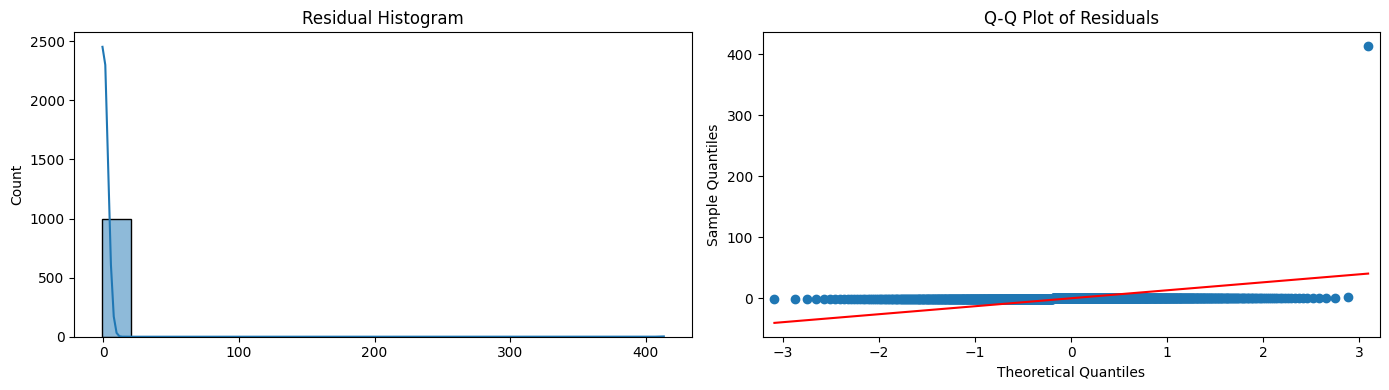

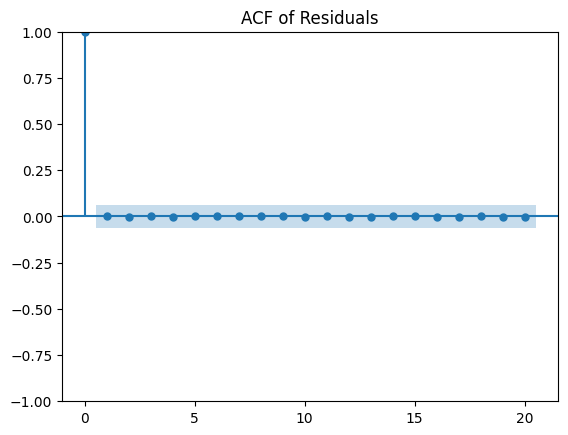

Ljung-Box Test Result:
     lb_stat  lb_pvalue
10  0.000735        1.0


In [23]:

# Residual Diagnostics
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf

# Get residuals from ARIMA model
residuals = m1_fit.resid

# Histogram and Q-Q Plot
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
sns.histplot(residuals, bins=20, kde=True)
plt.title("Residual Histogram")

plt.subplot(1, 2, 2)
sm.qqplot(residuals, line='s', ax=plt.gca())
plt.title("Q-Q Plot of Residuals")
plt.tight_layout()
plt.show()

# ACF Plot of Residuals
plot_acf(residuals, lags=20)
plt.title("ACF of Residuals")
plt.show()

# Ljung-Box test
lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print("Ljung-Box Test Result:")
print(lb_test)


ValueError: x and y must have same first dimension, but have shapes (200,) and (20,)

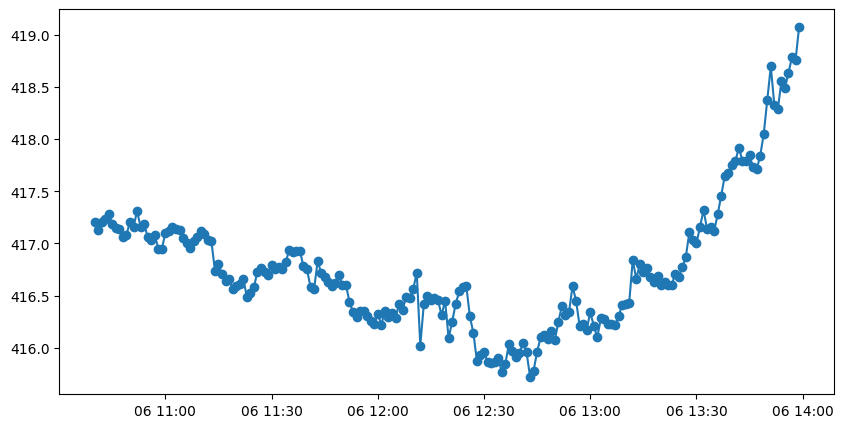

In [24]:

# Forecast with Confidence Intervals
forecast_result = m1_fit.get_prediction(start=start_index, end=end_index)
forecast_mean = forecast_result.predicted_mean
forecast_ci = forecast_result.conf_int()

# Plot with confidence intervals
plt.figure(figsize=(10, 5))
plt.plot(test.index, test.values, label="Actual", marker='o')
plt.plot(test.index, forecast_mean, label="Forecast", marker='x')
plt.fill_between(test.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1],
                 color='gray', alpha=0.3, label='95% Confidence Interval')
plt.title("Forecast vs Actual with Confidence Intervals")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op

Rolling Forecast MSE: 0.02


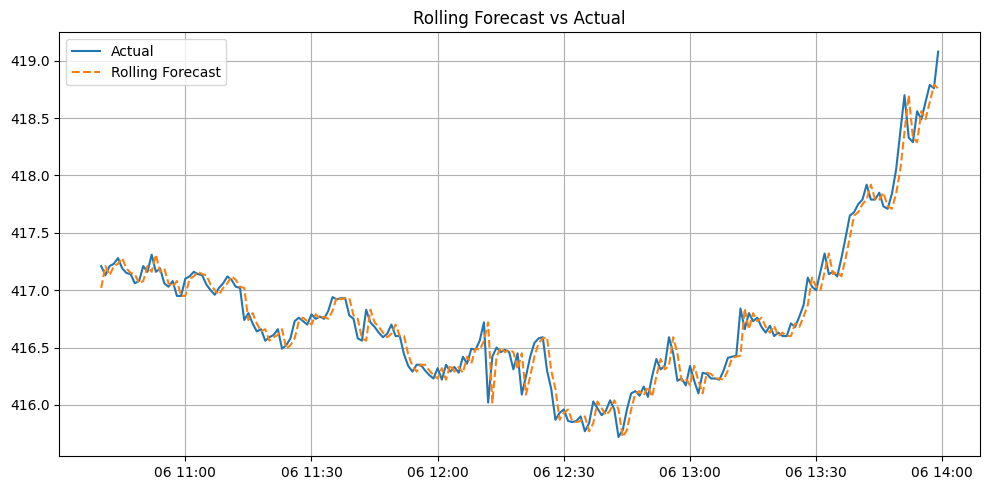

In [25]:

# Rolling Forecast Validation for ARIMA
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

rolling_predictions = []
history = list(train)

for t in range(len(test)):
    model = ARIMA(history, order=(0, 1, 0))  # adjust (p,d,q) as needed
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    rolling_predictions.append(yhat)
    history.append(test.iloc[t])  # update with actual value

# Evaluation
mse_rolling = mean_squared_error(test, rolling_predictions)
print(f"Rolling Forecast MSE: {mse_rolling:.2f}")

# Plot
plt.figure(figsize=(10, 5))
plt.plot(test.index, test.values, label='Actual')
plt.plot(test.index, rolling_predictions, label='Rolling Forecast', linestyle='--')
plt.title("Rolling Forecast vs Actual")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
